In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
mpl.rc('font',family= 'Malgun Gothic')  # 한글설정
import matplotlib.pyplot as plt  # 그래프 상세 옵션
import seaborn as sns  # 시각화


import plotly.express as px
import scipy.stats as stats

In [2]:
!pip install --user missingno

> # 결측치 시각화 라이브러리 불러오기

In [3]:
import missingno as msno

In [4]:
df1 = pd.read_csv('01_Data.csv')
df1.isnull().sum()  # 각 항목별 결측값의 개수 확인

Index               0
Member_ID           0
Sales_Type          0
Contract_Type       0
Channel             0
Datetime            0
Term                0
Payment_Type        0
Product_Type        0
Amount_Month        0
Customer_Type       2
Age              6972
Address1            2
Address2            2
State               0
Overdue_count       0
Overdue_Type        0
Gender              0
Credit_Rank      8781
Bank             2759
dtype: int64

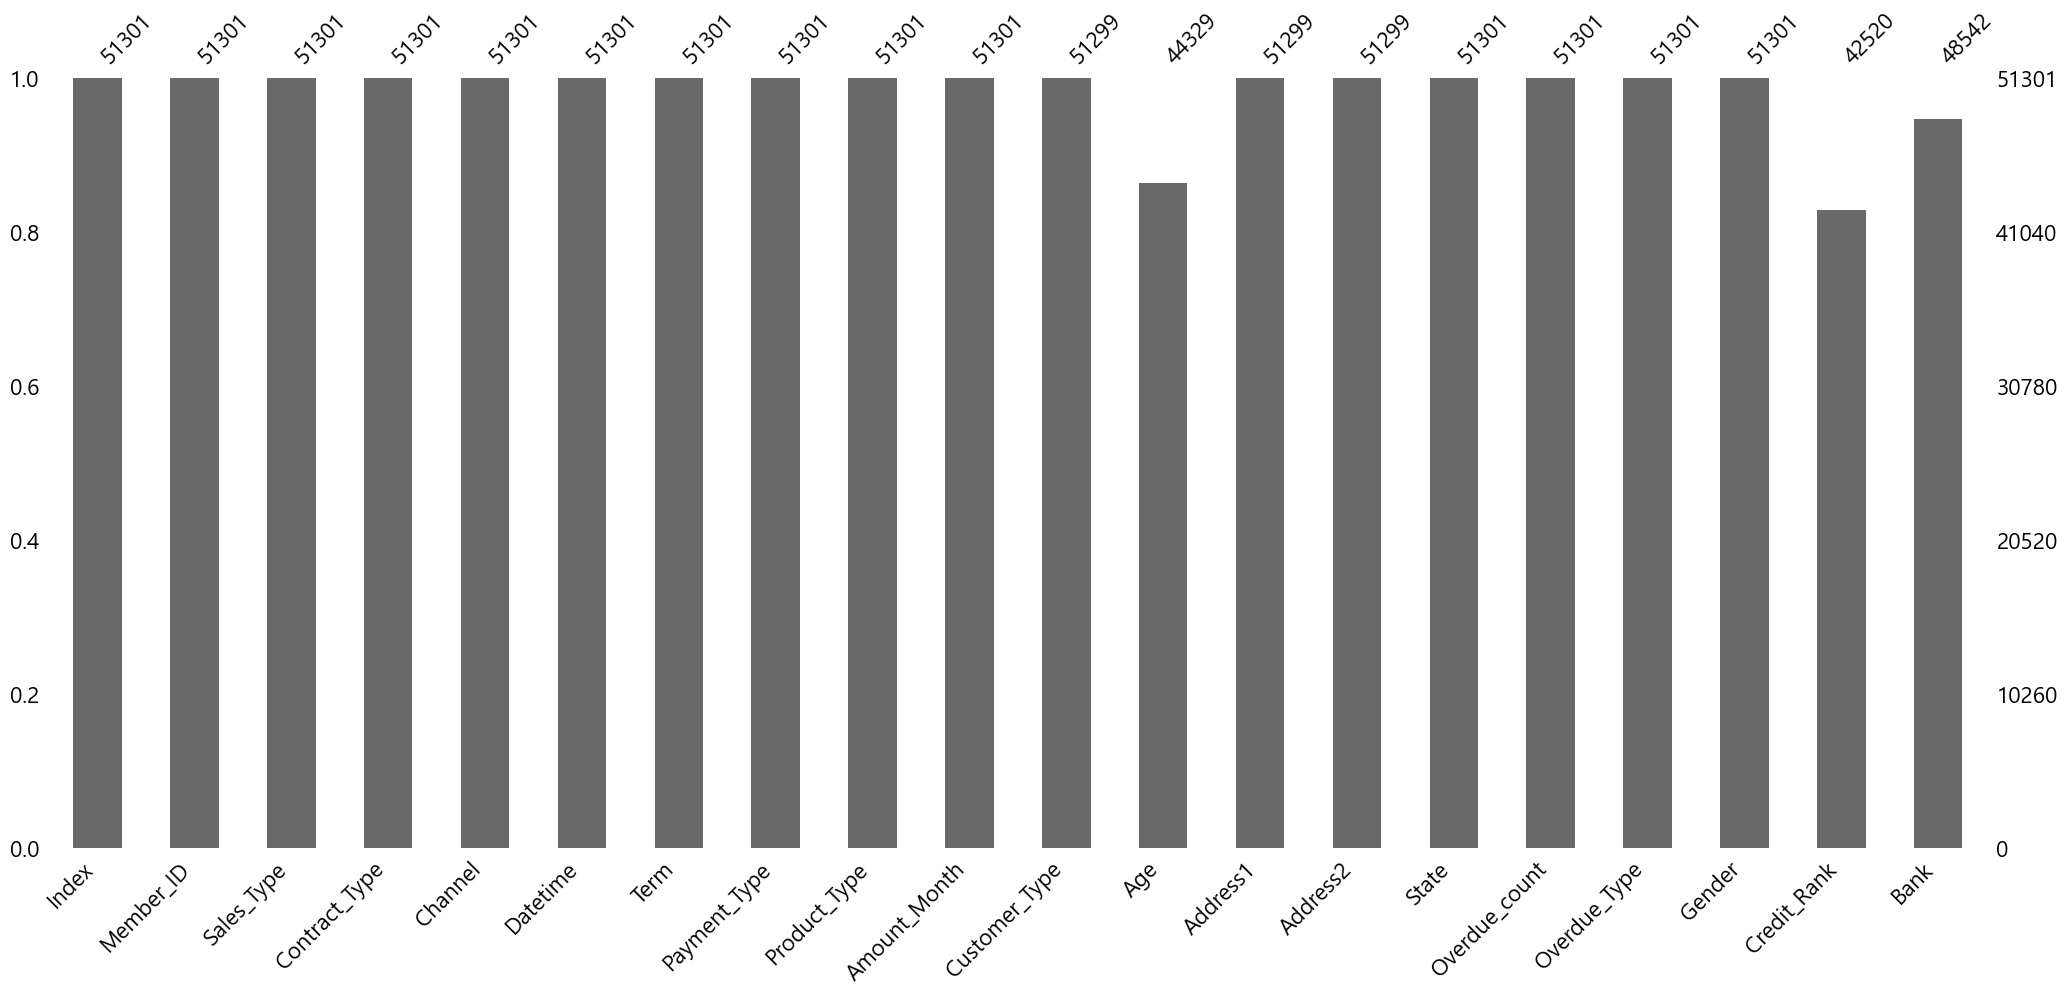

In [5]:
msno.bar(df1);  # 각 항목 별 실측값의 갯수와 결측치의 비율을 막대로 표현

> ### 결측치의 위치를 반환하는 시각화 그래프

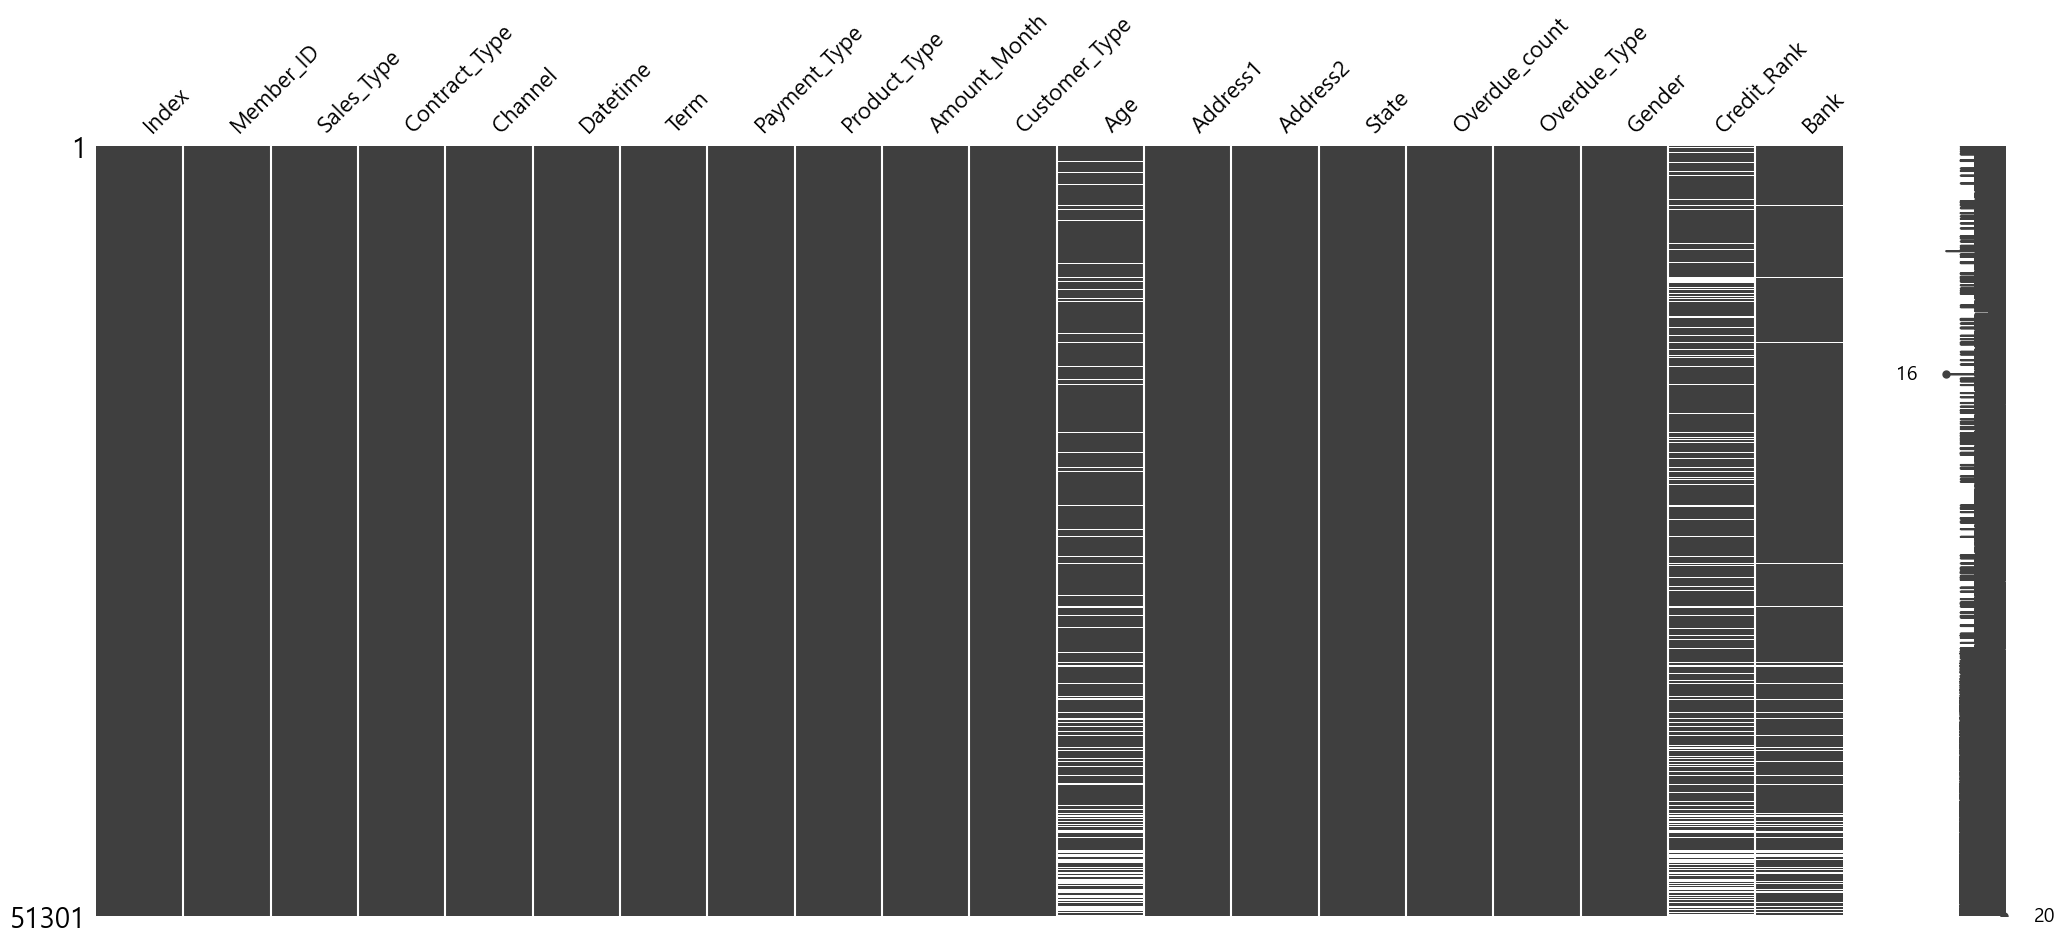

In [6]:
msno.matrix(df1);  # 결측값의 분포 위치를 확인

C:\Users\DMCCONET\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\DMCCONET\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


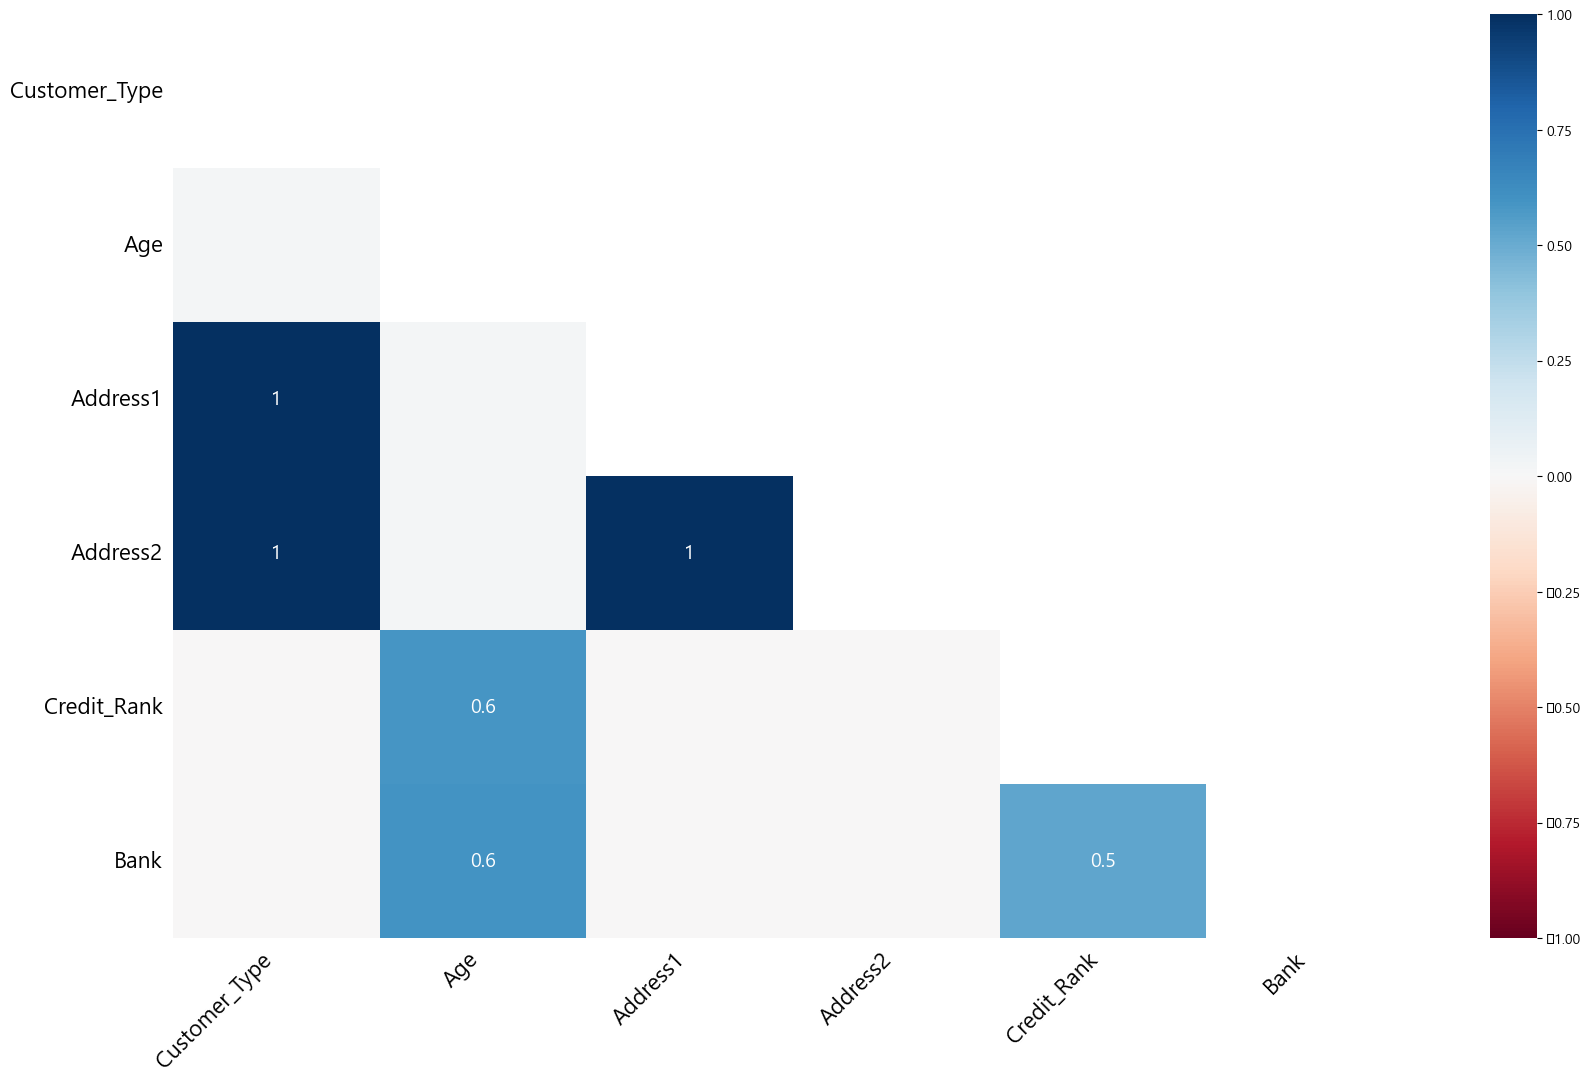

In [7]:
msno.heatmap(df1);

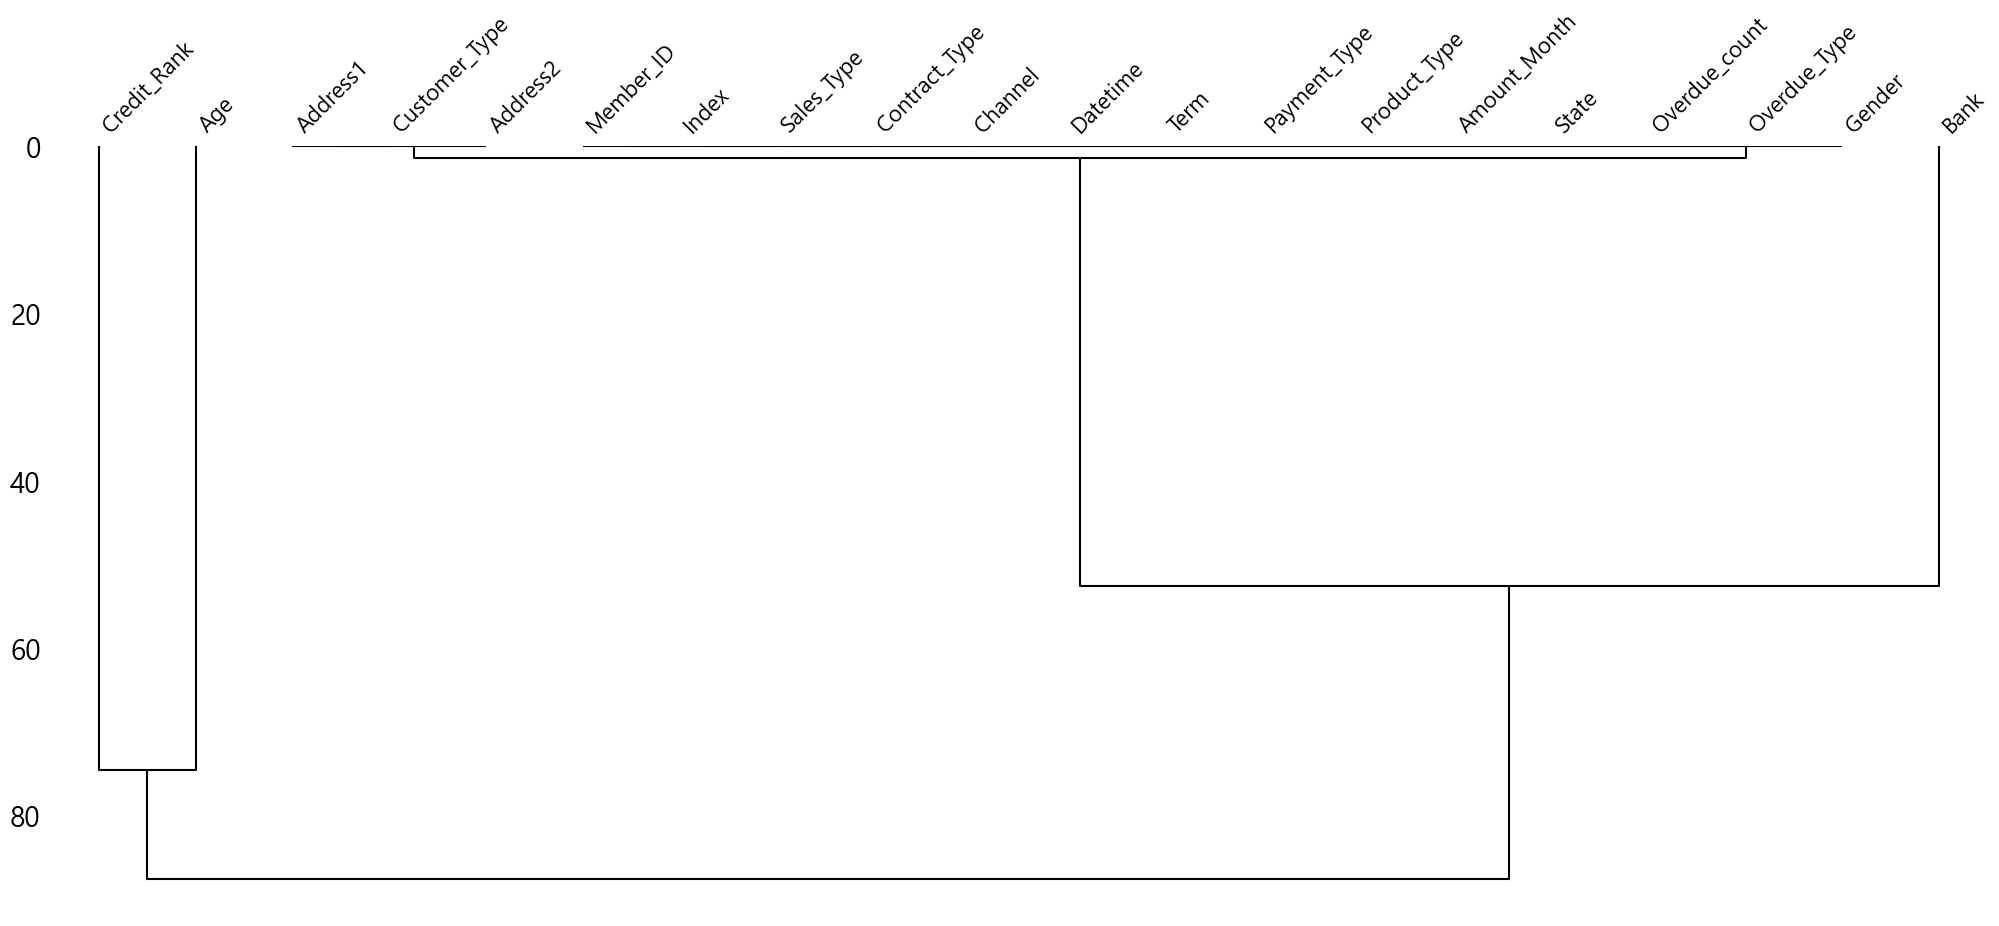

In [8]:
msno.dendrogram(df1);

> ### 범주형 데이터 조건 2개의 비율
: **crosstab()**

In [9]:
df1_cross = pd.crosstab(df1['Gender'], df1['Sales_Type'])
df1_cross

Sales_Type,렌탈,멤버십
Gender,,
남자,14733,966
여자,31750,3852


> #### 성별에 따라 판매우형이 달라지는가?
> ####성별 항목과 판매유형 항목은 서로 독립적인가? 연관성이 있는가?

> 귀무가설 : 성별과 판매유형 항목은 서로 독립이다.

> 대립가설 : 성별과 판매유형 항목은 서로 독립이 아니다.
    

In [10]:
# chi2 통계량/ P.value/자유도/기댓값
# P.value < 0.5 / 대립가설 참 / 연관성이 있다.

stats.chi2_contingency(df1_cross)

(278.2356916106161,
 1.8200099799409386e-62,
 1,
 array([[14224.60803883,  1474.39196117],
        [32258.39196117,  3343.60803883]]))

# Mission 10

- 12_Data.csv 를 가져와 df2로 선언하여 아래와 같은 미션을 수행하고자 한다. 
- 해당 데이터는 홈쇼핑 대행 업체 데이터 
1. '방송구분'데이터의 빈도수를 확인
2. df2의 결측값을 확인하고, 결측값을 bar 그래프로 시각화 
3. '방송구분'에 따른 '상품주문수량'의 평균을 계산하시오 
4. df2의 모든 연속형 데이터의 기술통계량을 확인 
5. '방송구분'에서 '재방송'에 해당하는 데이터만 뽑아 '상품목표주문금액'이 높은 상위 100개 데이터를 추출 
6. '방송구분'이라는 항목에서 '녹화방송'과 '재방송' 두집단의 '상품주문수량'의 평균의 차이가 있는지 가설 검정을 수행 
7. '방송구분'에서 '녹화방송'에 해당하는 데이터만 뽑아 '상품주문금액'의 평균과 중앙값의 차이를 계산 
8. '상품목표취급금액'과 '상품주문금액'간의 관계를 산점도로 시각화 
9. '매입형태'에 따라 '배송방식'이 달라지는지 가설검정을 수행


In [11]:
df2 = pd.read_csv('12_Data.csv')
df2

,방송Code,채널,소요분,가중분,방송구분,프로그램명,상품ID,상품명,매입과세구분,상품목표취급금액,...,상품취소수량,상품취소금액,ARS금액,매입형태,배송방식,상품소요분,상품가중분,상품방송순번,방송시작시간,방송종료시간
0,1.010036e+09,TV,50.0,52.7,녹화방송,재방_의류,10242138,[비지트인뉴욕콜렉션] 퓨어 캐시미어 롱코트,과세,65645345,...,73,9624136,1000,위탁매입,협력사배송,50.0,52.7,1,2020-01-03T00:10,2020-01-03T01:00
1,1.019126e+09,TV,60.0,38.1,녹화방송,재방_건강식품,10092003,[한삼인]순홍삼진(50ml*30포)*7박스+쇼7_2,과세,23774849,...,16,2547305,1000,위탁매입,직택배,30.0,19.1,1,2020-01-03T01:00,2020-01-03T02:00
2,1.019226e+09,TV,60.0,38.1,녹화방송,재방_건강식품,10092743,[단품_한삼인] 순홍삼진(50ml*30포)*1박스,과세,23774849,...,0,0,0,위탁매입,직택배,30.0,19.1,2,2020-01-03T01:00,2020-01-03T02:00
3,1.040337e+09,TV,60.0,19.7,재방송,재방_가공농산,10295865,이상용의 우리밀 크레마롤,과세,24568911,...,25,1080206,1000,위탁매입,협력사배송,60.0,19.7,1,2020-01-03T02:00,2020-01-03T03:00
4,1.021427e+09,TV,60.0,16.1,재방송,재방_신선수산,10113666,국내산 자숙 문어슬라이스 120g*9팩,면세,20131383,...,5,238512,1000,위탁매입,협력사배송,60.0,16.1,1,2020-01-03T03:00,2020-01-03T04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26278,1.046263e+13,TV,60.0,94.3,생방송,가전,11179512,■연말특가■제우스커브드 UHD TV 65형,과세,92367433,...,20,11783638,1000,위탁매입,협력사배송,19.9,32.6,1,2021-11-13T21:45,2021-11-13T22:45
26279,1.046263e+13,TV,60.0,94.3,생방송,가전,11179514,2019 제우스 UHD TV 75형,과세,33698544,...,4,4683636,1000,위탁매입,협력사배송,26.7,41.9,2,2021-11-13T21:45,2021-11-13T22:45
26280,1.046263e+13,TV,60.0,94.3,생방송,가전,11179504,■연말특가■제우스커브드 UHD TV 55형,과세,17202608,...,9,3667275,1000,위탁매입,협력사배송,13.4,22.7,3,2021-11-13T21:45,2021-11-13T22:45
26281,1.020263e+13,TV,60.0,91.6,재방송,재방_건강식품,11152474,[래오이경제] 흑염소진액 70ml x 120포,과세,154250864,...,27,3879990,1000,위탁매입,협력사배송,60.0,91.6,1,2021-11-13T22:45,2021-11-13T23:45


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26283 entries, 0 to 26282
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   방송Code    26283 non-null  float64
 1   채널        26283 non-null  object 
 2   소요분       26283 non-null  float64
 3   가중분       26283 non-null  float64
 4   방송구분      26283 non-null  object 
 5   프로그램명     26283 non-null  object 
 6   상품ID      26283 non-null  int64  
 7   상품명       26283 non-null  object 
 8   매입과세구분    26283 non-null  object 
 9   상품목표취급금액  26283 non-null  int64  
 10  상품목표주문금액  26283 non-null  int64  
 11  판매단가      26283 non-null  int64  
 12  수수료율      26283 non-null  float64
 13  상품주문수량    26283 non-null  int64  
 14  상품주문금액    26283 non-null  int64  
 15  상품취소수량    26283 non-null  int64  
 16  상품취소금액    26283 non-null  int64  
 17  ARS금액     26283 non-null  int64  
 18  매입형태      26283 non-null  object 
 19  배송방식      26283 non-null  object 
 20  상품소요분     26283 non-null  fl

In [13]:
#1) '방송구분'데이터의 빈도수를 확인

df2['방송구분'].value_counts()

생방송     18706
재방송      7538
녹화방송       39
Name: 방송구분, dtype: int64

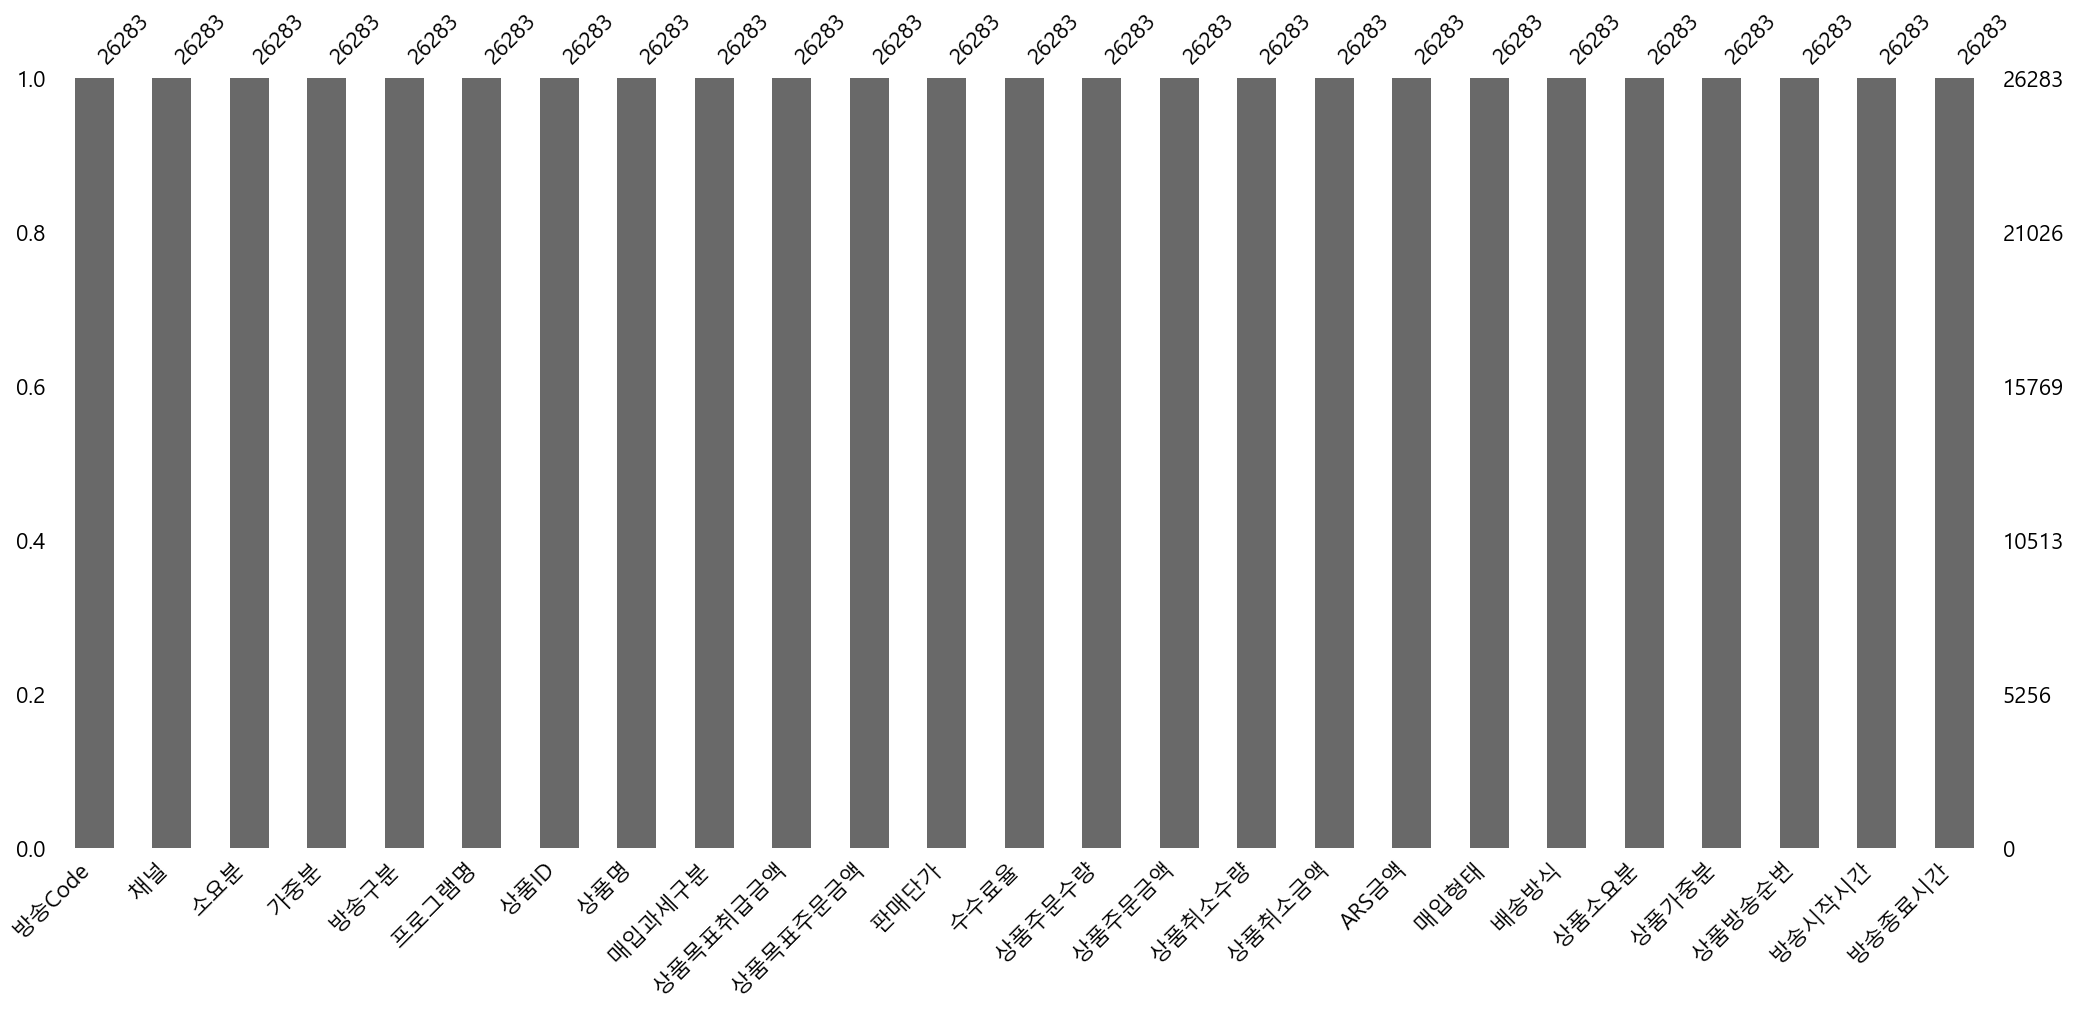

In [14]:
#2) df2의 결측값을 확인하고, 결측값을 bar 그래프로 시각화

# 결측치 없음

msno.bar(df2);

In [15]:
#3) '방송구분'에 따른 '상품주문수량'의 평균을 계산하시오

df2.pivot_table(index= '방송구분', values= '상품주문수량',
               aggfunc='mean')

,상품주문수량
방송구분,
녹화방송,337.871795
생방송,1154.316529
재방송,437.807774


In [16]:
#4) df2의 모든 연속형 데이터의 기술통계량을 확인


df2.describe()

,방송Code,소요분,가중분,상품ID,상품목표취급금액,상품목표주문금액,판매단가,수수료율,상품주문수량,상품주문금액,상품취소수량,상품취소금액,ARS금액,상품소요분,상품가중분,상품방송순번
count,2.628300e+04,26283.000000,26283.000000,2.628300e+04,2.628300e+04,2.628300e+04,2.628300e+04,26283.000000,26283.000000,2.628300e+04,26283.000000,2.628300e+04,26283.000000,26283.000000,26283.000000,26283.000000
mean,6.714543e+12,60.463501,62.738850,1.063470e+07,4.893658e+07,7.169959e+07,2.145554e+05,22.911692,947.609367,6.593023e+07,38.634593,3.145444e+06,1255.972454,37.090313,37.118088,2.854431
std,4.545276e+12,10.753614,33.412849,3.242029e+05,4.893987e+07,8.129376e+07,5.182702e+05,5.893382,1122.817191,9.141624e+07,52.981660,5.629631e+06,2092.334704,22.419075,31.435586,10.552536
min,1.010036e+09,2.900000,1.600000,1.001098e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000
25%,1.021254e+12,59.900000,42.800000,1.043544e+07,1.097226e+07,1.575876e+07,4.090000e+04,22.000000,85.000000,1.259542e+07,5.000000,4.884570e+05,1000.000000,18.700000,12.700000,1.000000
50%,1.006229e+13,60.000000,59.000000,1.058600e+07,3.448367e+07,4.971633e+07,5.990000e+04,25.000000,527.000000,4.068090e+07,21.000000,1.806076e+06,1000.000000,30.000000,27.700000,1.000000
75%,1.020260e+13,65.000000,90.400000,1.097324e+07,7.503096e+07,1.033874e+08,1.090000e+05,25.500000,1455.500000,9.044955e+07,54.500000,3.816610e+06,1000.000000,60.000000,53.800000,2.000000
max,1.309233e+13,180.000000,270.800000,1.118091e+07,7.378715e+08,1.229786e+09,7.990000e+06,52.770000,12119.000000,1.583191e+09,892.000000,2.335461e+08,30000.000000,145.000000,270.800000,99.000000


In [17]:
#5) '방송구분'에서 '재방송'에 해당하는 데이터만 뽑아 '상품목표주문금액'이 높은 상위 100개 데이터를 추출

df2[df2['방송구분'] == '재방송']['상품목표주문금액'].sort_values(ascending = False).head(100)

14838    742064855
23777    404719781
22868    401670547
23763    383295089
23787    327577035
           ...    
22169    129117128
4092     129074498
13034    128987411
14861    128679194
23767    128217954
Name: 상품목표주문금액, Length: 100, dtype: int64

In [1]:
# 6) '방송구분'이라는 항목에서 '녹화방송'과 '재방송' 두집단의 '상품주문수량'의 평균의 차이가 있는지 가설 검정을 수행




cond1 = df2['방송구분'].isin(['녹화방송','재방송' ])
df2[cond1]

cond2 = df2['방송구분'] == '녹화방송'
cond3 = df2['방송구분'] == '재방송'


stats.normaltest(df2[cond1].상품목표주문금액)


# NormaltestResult(statistic=6559.68603136862, pvalue=0.0)

# 상관관계 있음

stats.ranksums(df2[cond2]['상품목표주문금액'], df2[cond3]['상품목표주문금액'])


# RanksumsResult(statistic=-1.8382673272318208, pvalue=0.06602302308899481)
# 귀무가설 참

NameError: name 'df2' is not defined

In [19]:
#7) '방송구분'에서 '녹화방송'에 해당하는 데이터만 뽑아 '상품주문금액'의 평균과 중앙값의 차이를 계산

df2 = pd.read_csv('12_Data.csv')
df2
df2 = pd.read_csv('12_Data.csv')

cond2 = df2['방송구분'] == '녹화방송'
df2[cond2].pivot_table(index= '방송구분', values='상품주문금액',
                      aggfunc=['mean', 'median'])

,mean,median
,상품주문금액,상품주문금액
방송구분,,
녹화방송,1.984231e+07,12888341


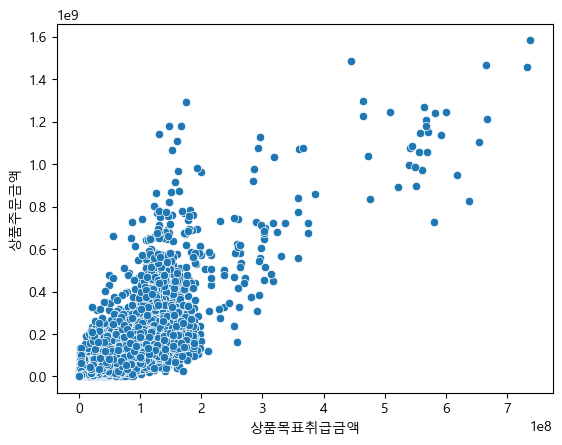

In [20]:
#8) '상품목표취급금액'과 '상품주문금액'간의 관계를 산점도로 시각화

sns.scatterplot(x=df2['상품목표취급금액'], y=df2['상품주문금액']);

In [21]:
# 9) '매입형태'에 따라 '배송방식'이 달라지는지 가설검정을 수행 

df2_cross = pd.crosstab(df2['매입형태'], df2['배송방식'])
df2_cross

배송방식,당사배송,직택배,협력사배송
매입형태,,,
위탁매입,1,996,24267
직매입,1019,0,0


In [22]:
stats.chi2_contingency(df2_cross)

(26256.193038804344,
 0.0,
 2,
 array([[  980.45428604,   957.38477343, 23326.16094053],
        [   39.54571396,    38.61522657,   940.83905947]]))

In [23]:
Y = df1['State'].replace({'계약확정': 0, '기간만료': 0,
                         '해약확정': 1, '해약진행중': 1})
X = df1[['Sales_Type', 'Gender', 'Term', 'Amount_Month',
       'Credit_Rank', 'Age', 'Product_Type']]

In [24]:
from sklearn.model_selection import train_test_split
from imblearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import  classification_report

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=1234)

In [28]:
numeric_pipe = make_pipeline(SimpleImputer(strategy='mean'),
                            MinMaxScaler())
category_pipe = make_pipeline(SimpleImputer(strategy='most_frequent'),
                             OneHotEncoder())

numeric_list = X.describe().columns.tolist()
category_list = X.describe(include='object').columns.tolist()

preprocessing_pipe = make_column_transformer((numeric_pipe, numeric_list),
                                            (category_pipe, category_list))
model_pipe = make_pipeline(preprocessing_pipe, SMOTE(), RandomForestClassifier)

In [29]:
def pipe_model_func(model):
    numeric_pipe = make_pipeline(SimpleImputer(strategy='mean'),
                            MinMaxScaler())
    category_pipe = make_pipeline(SimpleImputer(strategy='most_frequent'),
                             OneHotEncoder())

    numeric_list = X.describe().columns.tolist()
    category_list = X.describe(include='object').columns.tolist()

    preprocessing_pipe = make_column_transformer((numeric_pipe, numeric_list),
                                            (category_pipe, category_list))
    model_pipe = make_pipeline(preprocessing_pipe, SMOTE(), model)
    return model_pipe

In [30]:
model_pipe = pipe_model_func(RandomForestClassifier())
model_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['Term', 'Amount_Month',
                                                   'Credit_Rank', 'Age']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   On

In [31]:
hyperparameter_dict = {'randomforestclassifier__max_depth': range(5, 10),
                      'randomforestclassifier__min_samples_split': [10,30,50],
                      'randomforestclassifier__criterion': ['gini', 'entropy'],
                      'randomforestclassifier__n_estimators': [50,100,150]}

grid_model = GridSearchCV(model_pipe, param_grid=hyperparameter_dict,cv=3,
                         scoring='f1', n_jobs=-1)

grid_model.fit(X_train, Y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('minmaxscaler',
                                                                                          MinMaxScaler())]),
                                                                         ['Term',
                                                                          'Amount_Month',
                                                                          'Credit_Rank',
                                                                          'Age']),
                                                           

In [37]:
best_model = grid_model.best_estimator_

In [38]:
def evaluation_func(best_model):
    Y_train_pred = best_model.predict(X_train)
    Y_test_pred = best_model.predict(X_test)
    print('학습능력평가')
    print(classification_report(Y_train, Y_train_pred))
    print('일반화능력평가')
    print(classification_report(Y_test, Y_test_pred))

In [39]:
evaluation_func(best_model)

학습능력평가
              precision    recall  f1-score   support

           0       0.99      0.95      0.97     37984
           1       0.10      0.39      0.15       491

    accuracy                           0.95     38475
   macro avg       0.54      0.67      0.56     38475
weighted avg       0.98      0.95      0.96     38475

일반화능력평가
              precision    recall  f1-score   support

           0       0.99      0.95      0.97     12681
           1       0.08      0.37      0.14       145

    accuracy                           0.95     12826
   macro avg       0.54      0.66      0.55     12826
weighted avg       0.98      0.95      0.96     12826



> **변수 중요도 (Feature Importance)**
> 
    - 분류를 수행 할 때, 각 Feature가 얼마나 분류에 기여했는가를 나타내는 척도
    - Data를 나눌 때 기여도가 높은 columns을 확인
    - 변수중요도가 높다고 해서 Y ㄱㅄ이 직접적으로 변하지는 않음

> encoding한 값들을 list로 반환

In [40]:
encoder_list = best_model.named_steps['columntransformer'].transformers_[1][1].named_steps['onehotencoder'].get_feature_names().tolist()

encoder_list

C:\Users\DMCCONET\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0_렌탈',
 'x0_멤버십',
 'x1_남자',
 'x1_여자',
 'x2_DES-1',
 'x2_DES-2',
 'x2_DES-3A',
 'x2_DES-R4',
 'x2_ERA',
 'x2_MMC']

In [41]:
best_model['randomforestclassifier'].feature_importances_

array([0.36171556, 0.25220662, 0.03382445, 0.02921577, 0.16972684,
       0.0735425 , 0.00493796, 0.00225181, 0.04440545, 0.01634872,
       0.0009816 , 0.00366741, 0.00610361, 0.0010717 ])

In [42]:
df_importance = pd.DataFrame()
df_importance['Feature'] = pd.Series(numeric_list + encoder_list)
df_importance['Importance'] = best_model['randomforestclassifier'].feature_importances_

In [43]:
df_importance

,Feature,Importance
0,Term,0.361716
1,Amount_Month,0.252207
2,Credit_Rank,0.033824
3,Age,0.029216
4,x0_렌탈,0.169727
5,x0_멤버십,0.073543
6,x1_남자,0.004938
7,x1_여자,0.002252
8,x2_DES-1,0.044405
9,x2_DES-2,0.016349


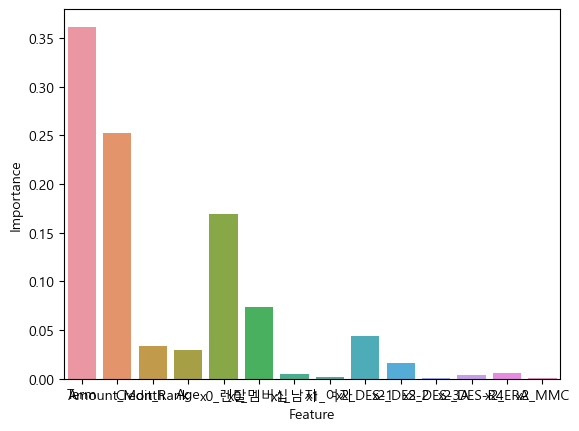

In [44]:
sns.barplot(data=df_importance, x='Feature', y='Importance');

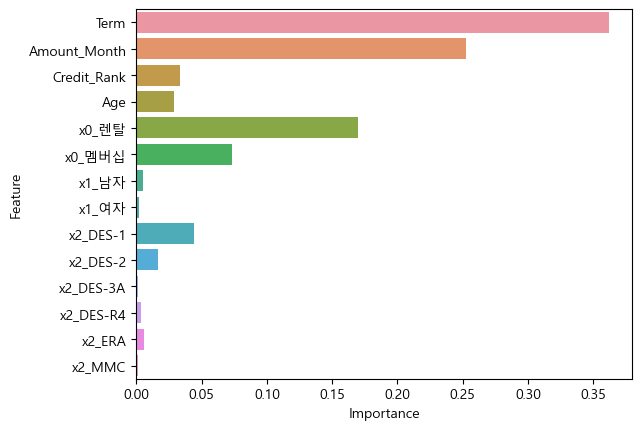

In [45]:
sns.barplot(data=df_importance, y='Feature', x='Importance');